# Jupyter for Data Engineering Demo

## Jupyter Notebooks

This is a Jupyter notebook! Notebooks make it easy to combine code, explanations, code output, and other resources like images in a single document that bundles the code with a story to go along with it. Notebooks have become one of the indispensable tools for data engineers and scientists, because they make it very easy to demonstrate and reproduce results, and to hand your code off to others who might be working with the pipeline that you have built. As a data engineer, I might give a data scientist a notebook that illustrates how the data pipeline is constructed and how they can easily access what they need.

Notebooks can hold links, images and other similar items, and they use a lightweight language called Markdown to make formatting easy. Jupyter notebooks and many common web tools like GitHub use Markdown, which is easy to remember and gets rendered into HTML.

### Markdown examples
- Unordered List
    - First sub-item
    - Second sub-item

1. Numbered List
    1. First list item
    2. Second list item

**Links**

- [More on Jupyter notebooks](https://jupyter.org/)
- [Pandas documentation](https://pandas.pydata.org/)

**Blockquotes**
> This is a is blockquote.
>> It has nested content.

**Code blocks**
```python
# this is some python code
my_list = range(10)
```

On a Unix-like system, use the `ls` command to list files in a directory.

The use of Markdown makes it easy to create notebooks that are visually appealing, well-organized, and give a narrative to go along with your code.

## Virtual Environments

For data professionals and anyone doing a lot of work in Python, another essential tool is the [*virtual environment*](https://docs.python.org/3/library/venv.html). The `venv` module provides these environments, which each have their own version of the Python interpreter and can have their own isolated set of package dependencies. That way, each application (or episode of teaching material) can have its own specific version of Python and packages which do not conflict with those in the other environments. The Python package ecosystem is huge, but all those possibilities mean that without a way to manage these dependencies, our applications could get conflicts.

It's easy to set up virtual environments with the following command:

```bash
python -m venv my_venv
```

Then, when we install packages in the standard way, using `pip`, we are installing them to the virtual environment, and not system-wide:

```bash
(my_venv) $ pip install pandas_gbq
```

VSCode makes it easy to work with virtual environments. You can easily select an interpreter version for your notebook from among the system-installed versions.

## Pandas

### Exploring Data with Pandas

Pandas provides, among many other things, a number of functions for exploring and analyzing data. Pandas makes it easy to read, manipulate and write data (ETL). A lot of things can be done with one line in Pandas that would take many lines of code in another language.

But before we go exploring, we first need to load some data. Pandas provides tools to make it easy to read data from many common formats. Here's an example of reading some data from a CSV (Comma Separated Value) file with the `read_csv()` function. The second argument to `read_csv()` tells Pandas that the zeroth row (zero-indexing is common with arrays and other similar data structures) contains header information, in particular the column names. Reading from a CSV file is one of the most common ways of ingesting data. This also demonstrates another great feature of Jupyter notebooks - interactive code blocks:

In [15]:
import pandas as pd
import numpy as np

data_dir = './'
airports_file = data_dir + 'airports.csv'
airports = pd.read_csv(airports_file, header=0)
print(airports.head())

  iata               airport              city state country        lat  \
0  00M              Thigpen        Bay Springs    MS     USA  31.953765   
1  00R  Livingston Municipal        Livingston    TX     USA  30.685861   
2  00V           Meadow Lake  Colorado Springs    CO     USA  38.945749   
3  01G          Perry-Warsaw             Perry    NY     USA  42.741347   
4  01J      Hilliard Airpark          Hilliard    FL     USA  30.688012   

          lon  
0  -89.234505  
1  -95.017928  
2 -104.569893  
3  -78.052081  
4  -81.905944  


Pandas reads our data into a very powerful object called a [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). DataFrames are two dimensional (organized columns and rows) data structures which make it easy to access and manipulate data. This two-dimensional structure closely follows the table structure used by all relational database systems. That makes it easy to work with our data in the format that database software (like MySQL or BigQuery) can understand. By associating each row with an index, DataFrames allow you to do things like access a portion (or 'slice') of your data:

In [3]:
# using slicing syntax in Pandas
airports.iloc[10:15,1:3]

,airport,city
10,Calhoun County,Pittsboro
11,Hawley Municipal,Hawley
12,Griffith-Merrillville,Griffith
13,Gatesville - City/County,Gatesville
14,Eureka,Eureka


Notice that with just a single short statement, we can access a specified range of columns and rows, in this case the 10th-15th rows, and the 1st-3rd columns of the DataFrame. This is something that, in another language than Python, we might have to use a for loop or something else that would occupy many lines of code, rather than a single statement.

DataFrames have a number of associated functions that make it easy to explore and preview data.In the above code block, calling the `head()` function on the DataFrame of airport data we read in from CSV lets us preview the data by showing the first few rows.

We already saw the `head()` function. Another DataFrame utility function, `info()`, shows us basic information about our data: 

In [5]:
print(airports.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   iata     3376 non-null   object 
 1   airport  3376 non-null   object 
 2   city     3364 non-null   object 
 3   state    3364 non-null   object 
 4   country  3376 non-null   object 
 5   lat      3376 non-null   float64
 6   lon      3376 non-null   float64
dtypes: float64(2), object(5)
memory usage: 184.8+ KB
None


From the above output, you can see that the `info()` function shows us the number of rows and columns, the numeric index, column names, counts of non-null values, the data types of each column, and even the memory usage of the DataFrame! This is the sort of powerful functionality that has made Pandas ubiquitous among data professionals.

The `pandas-profiling` package adds even more functionality to Pandas. This package makes it very easy to generate beautiful and informative reports like the one below, in HTML format for easy portability. The report gives overall information on the dataset, information about each of the variables and their statistical properties, missing values, and a detailed sample:

In [6]:
from pandas_profiling import ProfileReport

profile = ProfileReport(airports, title="Pandas Profiling Report")
profile.to_notebook_iframe()

/var/folders/p7/1230cnn96dl9pk5c3fbjl5y00000gn/T/ipykernel_37210/2676732768.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]


### Data Cleaning

We already saw how Pandas makes it easy to read in data from common formats. Now that we have some data in a DataFrame, let's look at some common processing tasks that data engineers do day in and day out. 

After loading our data and performing basic exploratory analysis, it is almost always necessary to do some pre-processing before we start working with our data. This step is called 'cleaning' and it's something that would be incredibly tedious if not for the tools that Pandas makes available. Let's say that we want to drop a couple of columns that we no longer need to use:

In [7]:
updated_airports = airports.rename(columns={'airport': 'airport_full_name',
                        'iata': 'iata_code'})

# drop the lat and lon columns from the new DataFrame inplace
updated_airports.drop(columns=['lat', 'lon'], inplace=True)

# remove rows - removing rows 0-3 by their label (index)
updated_airports.drop(labels=[0,1,2], inplace=True)

# Check our handywork
updated_airports.head()

,iata_code,airport_full_name,city,state,country
3,01G,Perry-Warsaw,Perry,NY,USA
4,01J,Hilliard Airpark,Hilliard,FL,USA
5,01M,Tishomingo County,Belmont,MS,USA
6,02A,Gragg-Wade,Clanton,AL,USA
7,02C,Capitol,Brookfield,WI,USA


We can see that, after running `drop()`, our updated data no longer includes the latitude and longitude columns.

What if we want to eliminate some rows - for example, any rows that don't include city and state information. Here's how we can do that. The Pandas `.iloc` syntax, used for label-based indexing, makes it quite easy:

In [8]:
airports.loc[airports.city.notna() & airports.state.notna()]

,iata,airport,city,state,country,lat,lon
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
...,...,...,...,...,...,...,...
3371,ZEF,Elkin Municipal,Elkin,NC,USA,36.280024,-80.786069
3372,ZER,Schuylkill Cty/Joe Zerbey,Pottsville,PA,USA,40.706449,-76.373147
3373,ZPH,Zephyrhills Municipal,Zephyrhills,FL,USA,28.228065,-82.155916
3374,ZUN,Black Rock,Zuni,NM,USA,35.083227,-108.791777


### Writing Data

Now that we have done some cleaning of our data, we might want to save the updated version to a file. Pandas makes it easy to write to a number of common formats, like CSV, JSON, HTML, and others. The `to_json()` function, for example, will write the data in our `DataFrame` object to a JSON file:

In [9]:
# write json row format
airports.to_json(data_dir + 'airports.json', orient='records', lines=True)
# write compressed parquet format

### Joining, Grouping, and Aggregating Data

One of the most common data engineering tasks is to join together data from multiple sources or tables. Pandas gives us a number of tools for joining data. 

Let's say that we want to know how many routes begin from each airport in our dataset. In order to do that, we need to combine data from two different source tables. We have already loaded the airport data, so now we need to load the route data from its CSV file:

In [9]:
data_dir = './'
routes_file = data_dir + 'routes.csv'
routes = pd.read_csv(routes_file, header=0)
print(routes.head())

  airline  src dest codeshare  stops equipment
0      2B  ASF  KZN       NaN      0       CR2
1      2B  ASF  MRV       NaN      0       CR2
2      2B  CEK  KZN       NaN      0       CR2
3      2B  CEK  OVB       NaN      0       CR2
4      2B  DME  KZN       NaN      0       CR2


Now we have two DataFrames, one containing airport data, and one containing route data. In order to perform aggregate calculations which reference both DataFrames, we need to combine or *join* them into a single DataFrame. Pandas provides a number of methods for doing this, and in this case we will use the `merge()` method to perform an *inner join* ([more on join types](https://www.geeksforgeeks.org/different-types-of-joins-in-pandas/)). An inner join is appropriate in this case because it will return exactly one row from each table where the rows match on a specified value.

In [10]:
#Combine airports and routes DataFrames into a single new DataFrame
routes_src = pd.merge(airports, routes, left_on='iata', right_on='src')
routes_src.head()

,iata,airport,city,state,country,lat,lon,airline,src,dest,codeshare,stops,equipment
0,AAT,Alturas Municipal,Alturas,CA,USA,41.483000,-120.565361,CZ,AAT,URC,NaN,0,73G E90
1,AAT,Alturas Municipal,Alturas,CA,USA,41.483000,-120.565361,GS,AAT,URC,NaN,0,E90
2,ABE,Lehigh Valley International,Allentown,PA,USA,40.652363,-75.440402,AA,ABE,CLT,Y,0,CR9 CR7 CRJ
3,ABE,Lehigh Valley International,Allentown,PA,USA,40.652363,-75.440402,AA,ABE,PHL,NaN,0,DH3
4,ABE,Lehigh Valley International,Allentown,PA,USA,40.652363,-75.440402,AF,ABE,ATL,Y,0,CRJ


The resulting DataFrame has one row for each route source - for example, there are two routes which have the AAT (Alturas Municipal) airport as a source, so this new DataFrame has two rows which have Alturas as the airport. This is closer, but still not quite what we want. We are interested in getting a DataFrame where each row corresponds to one airport and contains a count of the number of rows for each airport. How can we do that?

First we need to *group* the data by the airport, so that all the rows for each airport go into their own group. Then, we can apply an aggregating function (in this case, `count()`) to the grouped data. Finally, we can combine the new results into an updated DataFrame.

This is an example of what is often called a [*split-apply-combine*](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) strategy for manipulating data.

In [11]:
# group the new DataFrame by airport
routes_grouped = routes_src.groupby('airport')
print(routes_grouped.head())

# group the new DataFrame by airport, get a group count, make the count its own column
airports_route_counts = routes_src.groupby(['airport','lat','lon','city','state']).iata.agg('count').to_frame('route_count').reset_index()
# re-sort by the route count, descending, and store the top 20 rows in a new variable
airports_top20 = airports_route_counts.sort_values(by='route_count', ascending=False).head(20)

airports_top20

      iata                       airport        city state country        lat  \
0      AAT             Alturas Municipal     Alturas    CA     USA  41.483000   
1      AAT             Alturas Municipal     Alturas    CA     USA  41.483000   
2      ABE   Lehigh Valley International   Allentown    PA     USA  40.652363   
3      ABE   Lehigh Valley International   Allentown    PA     USA  40.652363   
4      ABE   Lehigh Valley International   Allentown    PA     USA  40.652363   
...    ...                           ...         ...   ...     ...        ...   
14876  YNG    Youngstown-Warren Regional  Youngstown    OH     USA  41.260736   
14877  YNG    Youngstown-Warren Regional  Youngstown    OH     USA  41.260736   
14878  YUM  Yuma MCAS-Yuma International        Yuma    AZ     USA  32.656583   
14879  YUM  Yuma MCAS-Yuma International        Yuma    AZ     USA  32.656583   
14880  YUM  Yuma MCAS-Yuma International        Yuma    AZ     USA  32.656583   

              lon airline  

,airport,lat,lon,city,state,route_count
620,William B Hartsfield-Atlanta Intl,33.640444,-84.426944,Atlanta,GA,915
105,Chicago O'Hare International,41.979595,-87.904464,Chicago,IL,558
329,Los Angeles International,33.942536,-118.408074,Los Angeles,CA,492
133,Dallas-Fort Worth International,32.895951,-97.037200,Dallas-Fort Worth,TX,469
268,John F Kennedy Intl,40.639751,-73.778926,New York,NY,456
226,Hampton Roads Executive,36.780149,-76.448835,Portsmouth,VA,411
365,Miami International,25.793250,-80.290556,Miami,FL,368
143,Denver Intl,39.858408,-104.667002,Denver,CO,361
96,Charlotte/Douglas International,35.214011,-80.943126,Charlotte,NC,301
435,Philadelphia Intl,39.871953,-75.241141,Philadelphia,PA,289


The result of this set of operations is a DataFrame where each row corresponds to one airport, which contains a column with the count of the route initiations for that airport, which is sorted in descending order, and which contains only the twenty largest airports by this route count.

Notice that we can chain together Pandas functions in a single statement to make our code extremely compact. The statement above which assigns the `airports_route_counts` variable is performing a grouping, an aggregation, creating a new column from the count, and resetting the index all in a single statement. If we wanted to, we could even combine that and the following line to perform all those steps along with the sorting and filtering step which gives us the top 20 airports. But sometimes code is more readable when broken into separate steps.

Now that we have a combined DataFrame which has been grouped, aggregated, sorted, and filtered, let's visualize the result. This step is more properly considered data science, but it is useful for this demo to show the whole process from start to finish, including the data engineering steps and the end result visualization which would be consumed by a decision-maker.

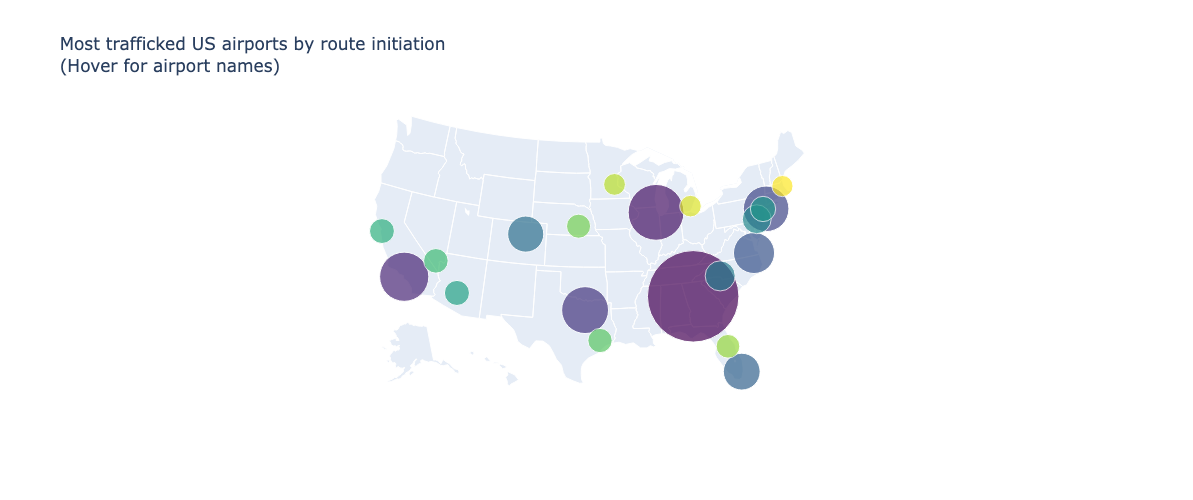

In [19]:
import plotly.graph_objects as go

# set the text blurb for each airport in the DataFrame
airports_top20['text'] = airports_top20['airport'] + ' - ' + airports_top20['city'] + ', ' + airports_top20['state'] + '<br>' + 'Routes: ' + airports_top20['route_count'].astype(str)

# build the Plotly figure
fig = go.Figure(go.Scattergeo(
    lat=airports_top20['lat'],
    lon=airports_top20['lon'],
    text=airports_top20['text'],
    marker=dict(color=list(range(20)),
                colorscale='viridis',
                # divide by ten to make the bubble size more reasonable
                size=airports_top20['route_count']/10)
))

# update layout to show only US portion of map and set title
fig.update_layout(
        title = 'Most trafficked US airports by route initiation<br>(Hover for airport names)',
        geo_scope='usa',
    )

# display the plot
fig.update_layout(width=1000, height=500)
fig.show()

### Data on the Cloud (Google BigQuery)

In [12]:
import pandas_gbq

# TODO: Set project_id to your Google Cloud Platform project ID.
project_id = "dbt-test-123"

# TODO: Set table_id to the full destination table ID (including the
#       dataset ID).
table_id = 'airports_routes.routes_merged'

pandas_gbq.to_gbq(updated_airports, table_id, project_id=project_id, if_exists='replace')

100%|███████████████████████████████████████████| 1/1 [00:00<00:00, 15650.39it/s]


The `to_gbq()` is one of the many powerful Pandas functions that makes data operations easy. Notice that we didn't even have to specify a schema (data format) - the `to_gbq()` function inferred the schema automatically from the contents of our DataFrame. BigQuery is a unified analytics engine optimized for big data transactions. It's [serverless](https://cloud.google.com/serverless), meaning that the developer doesn't have to deal with any of the details of infrastructure management. At Data Stack Academy, BigQuery is a significant part of our course, because it's so powerful and easy to use for building complex, high-performance data pipelines.

In the modern world of data, many organizations are dealing with huge volumes of data - perhaps hundred of terabytes, or even petabytes (1 petabyte = 1000 terabytes) or exabytes (1 exabyte = 1000 petabytes). With volumes of data that large, many of the database tools that have been used in the past can no longer keep up with huge demands that companies have. BigQuery is great because it can handle massive amounts of data, and does not require the user to deal with any of the details of server configuration that a database administrator used to handle in the past, leaving more time to actually work with the data and build pipelines.